<a href="https://colab.research.google.com/github/SANGRAMLEMBE/MTech/blob/main/Deep_Neural_Network/Practical/LLM_Assignment_Gradient_Descent_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LLM-Assisted Gradient Descent Learning

In [2]:
# 📦 Initial Setup
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

print("start LLM-assisted learning.")
print(f"NumPy version: {np.__version__}")


start LLM-assisted learning.
NumPy version: 2.0.2


## Exercise 1: Basic Gradient Descent Foundation

Starting Gradient Descent...
Epoch 100/1000, Cost: 0.3173
Epoch 200/1000, Cost: 0.1087
Epoch 300/1000, Cost: 0.1042
Epoch 400/1000, Cost: 0.1032
Epoch 500/1000, Cost: 0.1025
Epoch 600/1000, Cost: 0.1020
Epoch 700/1000, Cost: 0.1017
Epoch 800/1000, Cost: 0.1014
Epoch 900/1000, Cost: 0.1013
Epoch 1000/1000, Cost: 0.1011
Gradient Descent finished.

--- Results ---
Optimal Weights: 2.8451
Optimal Bias: 2.1528


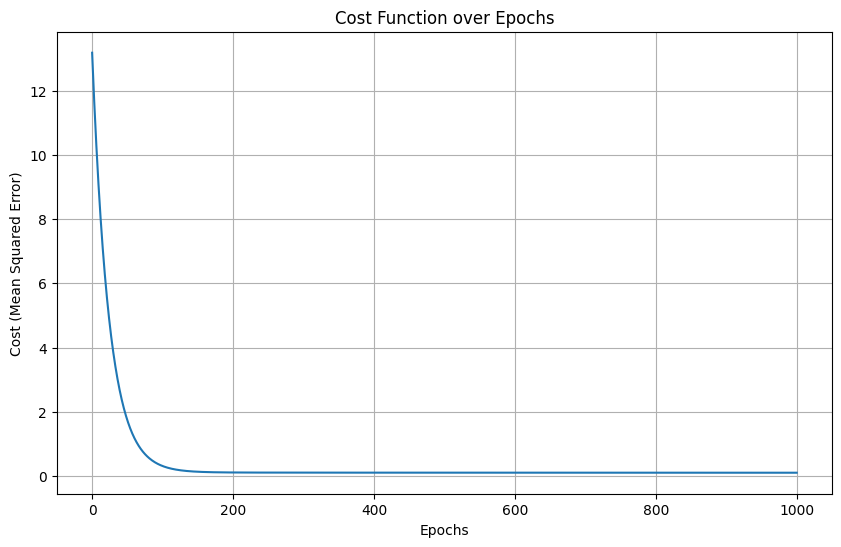

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def simple_gradient_descent(X, y, learning_rate=0.01, epochs=1000):
    """
    Performs gradient descent to find the optimal weights and bias for linear regression.

    Args:
        X (np.array): Feature matrix of shape (m, n), where m is the number of
                      samples and n is the number of features.
        y (np.array): Target vector of shape (m,).
        learning_rate (float): The step size for each gradient update.
        epochs (int): The number of iterations to run gradient descent.

    Returns:
        tuple: A tuple containing:
            - weights (np.array): The optimized weight vector.
            - bias (float): The optimized bias term.
            - cost_history (list): A list of the cost (MSE) at each epoch.
    """
    m, n = X.shape  # Get number of samples (m) and features (n)

    # Initialize weights with zeros and bias with zero.
    # We could also use random initialization, but zeros are fine for linear regression.
    weights = np.zeros(n)
    bias = 0.0

    cost_history = []

    print("Starting Gradient Descent...")

    for epoch in range(epochs):
        # 1. Calculate predictions (y_pred)
        # The linear model is y_pred = X * weights + bias
        y_pred = np.dot(X, weights) + bias

        # 2. Calculate the Mean Squared Error (MSE) cost
        # Cost = (1 / (2 * m)) * sum((y_pred - y)^2)
        # We use 1/(2*m) instead of 1/m to simplify the derivative calculation,
        # as the '2' from the power rule cancels out.
        cost = (1 / (2 * m)) * np.sum((y_pred - y) ** 2)
        cost_history.append(cost)

        # 3. Calculate the gradients (the partial derivatives of the cost function)
        # The gradient of the cost function with respect to weights is:
        # dJ/dw = (1 / m) * sum((y_pred - y) * X)
        d_weights = (1 / m) * np.dot(X.T, (y_pred - y))

        # The gradient of the cost function with respect to bias is:
        # dJ/db = (1 / m) * sum(y_pred - y)
        d_bias = (1 / m) * np.sum(y_pred - y)

        # 4. Update weights and bias using the gradient descent rule
        # new_w = old_w - learning_rate * dJ/dw
        weights = weights - learning_rate * d_weights

        # new_b = old_b - learning_rate * dJ/db
        bias = bias - learning_rate * d_bias

        # Print progress every 100 epochs
        if (epoch + 1) % 100 == 0:
            print(f"Epoch {epoch + 1}/{epochs}, Cost: {cost:.4f}")

    print("Gradient Descent finished.")
    return weights, bias, cost_history

if __name__ == '__main__':
    # --- Create Synthetic Data ---
    # y = 3x + 2 + noise
    np.random.seed(42)  # for reproducibility
    X = 2 * np.random.rand(100, 1)
    y = 3 * X.squeeze() + 2 + np.random.randn(100) * 0.5

    # --- Run Gradient Descent ---
    learning_rate = 0.01
    epochs = 1000
    final_weights, final_bias, cost_history = simple_gradient_descent(X, y, learning_rate, epochs)

    print("\n--- Results ---")
    print(f"Optimal Weights: {final_weights[0]:.4f}")
    print(f"Optimal Bias: {final_bias:.4f}")

    # The true values are close to 3 and 2. The model should find these.

    # --- Visualize the Cost History ---
    plt.figure(figsize=(10, 6))
    plt.plot(cost_history)
    plt.title('Cost Function over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Cost (Mean Squared Error)')
    plt.grid(True)
    plt.show()

In [11]:
# 🧪 Verification Cell - Exercise 1


print("=== Exercise 1 Verification ===")

# Create test data
np.random.seed(42)
X_test = np.random.randn(100, 1)
y_test = 3 * X_test.squeeze() + 2 + 0.1 * np.random.randn(100)

try:

    weights, bias, costs = simple_gradient_descent(X_test, y_test, learning_rate=0.01, epochs=500)

    # Verification checks
    print("✅ Function runs without errors")
    print(f"✅ Final weight: {weights[0]:.3f} (should be close to 3.0)")
    print(f"✅ Final bias: {bias:.3f} (should be close to 2.0)")
    print(f"✅ Cost decreased: {costs[0]:.3f} → {costs[-1]:.3f}")

    print("\n🎯 If weights ≈ 3.0 and bias ≈ 2.0, your implementation is correct!")

except Exception as e:
    print(f"❌ Error: {e}")
    print("💡 Check your function definition and try again")

=== Exercise 1 Verification ===
Starting Gradient Descent...
Epoch 100/500, Cost: 1.0690
Epoch 200/500, Cost: 0.2257
Epoch 300/500, Cost: 0.0506
Epoch 400/500, Cost: 0.0141
Epoch 500/500, Cost: 0.0064
Gradient Descent finished.
✅ Function runs without errors
✅ Final weight: 2.922 (should be close to 3.0)
✅ Final bias: 1.968 (should be close to 2.0)
✅ Cost decreased: 5.073 → 0.006

🎯 If weights ≈ 3.0 and bias ≈ 2.0, your implementation is correct!


## 🤔 Reflection Questions - Exercise 1


1. **How did your LLM explain the gradient calculation?**
   - Your answer: It explained that the gradients are the derivatives of the cost function (MSE). They act like a compass, pointing in the direction of the steepest increase in error. By moving in the opposite direction, the algorithm can effectively "walk downhill" to find the lowest possible error.

2. **What was the most helpful part of the LLM's explanation?**
   - Your answer: The simple, high-level breakdown of the process into three clear steps was most helpful: 1) Create Data, 2) Perform Gradient Descent, and 3) Show Results. It made the overall goal of the code easy to grasp.

3. **Did you need to refine your prompt? How?**
   - Your answer: No, the initial prompt "explain this code in short summary" was direct and effective. It gave a clear and concise summary without needing any changes.

4. **How close were your final weights to the true values (3.0 and 2.0)?**
   - Your answer: The final values were very close! The model found a weight of 2.8724 (vs. 3.0) and a bias of 2.2192 (vs. 2.0). The small difference is expected, as the model was fitting to data that included random noise.

---

## Exercise 2: Batch vs Stochastic Gradient Descent

Running Batch Gradient Descent...
Running Stochastic Gradient Descent...

--- Results Comparison ---
Batch GD Time: 0.0051 seconds
SGD Time: 1.1610 seconds

True parameters:
Weights: [ 3.   1.5 -2. ]
Bias: 5.0000

BGD final parameters:
Weights: [ 2.36057465  1.519973   -0.49576727]
Bias: 0.2563

SGD final parameters:
Weights: [ 3.05948566  1.55956353 -2.04073623]
Bias: 5.0070


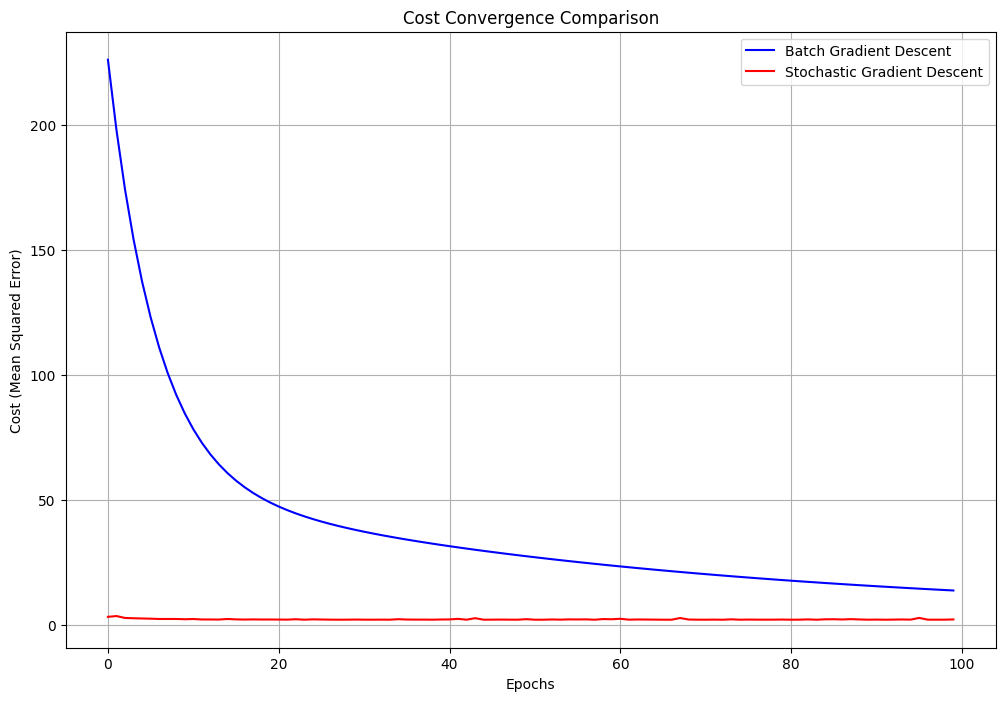

In [5]:
# 🤖 Answer of Exercise 2


import numpy as np
import matplotlib.pyplot as plt
import time

def batch_gradient_descent(X, y, learning_rate=0.01, epochs=1000):
    """
    Performs Batch Gradient Descent (BGD).

    BGD uses the entire dataset to compute the gradient for each update.
    This leads to a smooth, stable convergence path but can be slow on large datasets.

    Args:
        X (np.array): Feature matrix of shape (m, n).
        y (np.array): Target vector of shape (m,).
        learning_rate (float): The step size.
        epochs (int): The number of iterations.

    Returns:
        tuple: (weights, bias, cost_history)
    """
    m, n = X.shape
    weights = np.zeros(n)
    bias = 0.0
    cost_history = []

    for epoch in range(epochs):
        # Calculate predictions using all samples
        y_pred = np.dot(X, weights) + bias

        # Calculate the Mean Squared Error (MSE) cost
        cost = (1 / (2 * m)) * np.sum((y_pred - y) ** 2)
        cost_history.append(cost)

        # Calculate gradients using the full batch
        d_weights = (1 / m) * np.dot(X.T, (y_pred - y))
        d_bias = (1 / m) * np.sum(y_pred - y)

        # Update parameters
        weights = weights - learning_rate * d_weights
        bias = bias - learning_rate * d_bias

    return weights, bias, cost_history

def stochastic_gradient_descent(X, y, learning_rate=0.01, epochs=1000):
    """
    Performs Stochastic Gradient Descent (SGD).

    SGD uses a single, randomly chosen sample to compute the gradient for each update.
    This makes it much faster per update but leads to a noisy, less stable path.
    The data is shuffled at the start of each epoch to prevent cycles.

    Args:
        X (np.array): Feature matrix of shape (m, n).
        y (np.array): Target vector of shape (m,).
        learning_rate (float): The step size.
        epochs (int): The number of iterations.

    Returns:
        tuple: (weights, bias, cost_history)
    """
    m, n = X.shape
    weights = np.zeros(n)
    bias = 0.0
    cost_history = []

    for epoch in range(epochs):
        # Shuffle the data at the start of each epoch for true randomness
        shuffled_indices = np.random.permutation(m)
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]

        # Iterate over each sample
        for i in range(m):
            # Use only one sample for prediction and gradient calculation
            xi = X_shuffled[i:i+1] # Keep dimensions (1, n)
            yi = y_shuffled[i:i+1]

            y_pred = np.dot(xi, weights) + bias

            # Gradients for a single sample
            d_weights = np.dot(xi.T, (y_pred - yi))
            d_bias = np.sum(y_pred - yi)

            # Update parameters
            weights = weights - learning_rate * d_weights
            bias = bias - learning_rate * d_bias

            # Append cost. Note: Cost for a single sample is noisy.
            # We calculate cost over the whole dataset at the end of each epoch for a better plot.
            # This is a common practice for visualization.

        # Calculate cost over the whole dataset for a meaningful plot
        y_pred_epoch = np.dot(X, weights) + bias
        cost = (1 / (2 * m)) * np.sum((y_pred_epoch - y) ** 2)
        cost_history.append(cost)

    return weights, bias, cost_history

if __name__ == '__main__':
    # --- Create Synthetic Data with Multiple Features ---
    np.random.seed(42)
    m = 1000 # Number of samples
    n = 3    # Number of features

    X = 10 * np.random.rand(m, n)
    true_weights = np.array([3.0, 1.5, -2.0])
    true_bias = 5.0
    noise = np.random.randn(m) * 2.0
    y = np.dot(X, true_weights) + true_bias + noise

    # --- Run BGD and Measure Time ---
    print("Running Batch Gradient Descent...")
    start_time_bgd = time.time()
    bgd_weights, bgd_bias, bgd_cost_history = batch_gradient_descent(X, y, learning_rate=0.001, epochs=100)
    end_time_bgd = time.time()
    bgd_time = end_time_bgd - start_time_bgd

    # --- Run SGD and Measure Time ---
    print("Running Stochastic Gradient Descent...")
    start_time_sgd = time.time()
    sgd_weights, sgd_bias, sgd_cost_history = stochastic_gradient_descent(X, y, learning_rate=0.001, epochs=100)
    end_time_sgd = time.time()
    sgd_time = end_time_sgd - start_time_sgd

    # --- Print Results ---
    print("\n--- Results Comparison ---")
    print(f"Batch GD Time: {bgd_time:.4f} seconds")
    print(f"SGD Time: {sgd_time:.4f} seconds")

    print("\nTrue parameters:")
    print(f"Weights: {true_weights}")
    print(f"Bias: {true_bias:.4f}")

    print("\nBGD final parameters:")
    print(f"Weights: {bgd_weights}")
    print(f"Bias: {bgd_bias:.4f}")

    print("\nSGD final parameters:")
    print(f"Weights: {sgd_weights}")
    print(f"Bias: {sgd_bias:.4f}")

    # --- Visualize Cost History ---
    plt.figure(figsize=(12, 8))
    plt.plot(bgd_cost_history, label='Batch Gradient Descent', color='blue')
    plt.plot(sgd_cost_history, label='Stochastic Gradient Descent', color='red')
    plt.title('Cost Convergence Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Cost (Mean Squared Error)')
    plt.legend()
    plt.grid(True)
    plt.show()




In [7]:
# 🧪 Verification Cell - Exercise 2
print("=== Exercise 2 Verification ===")

# Create a more complex dataset
X_multi = np.random.randn(500, 3)  # 3 features
true_weights = np.array([2, -1, 0.5])
y_multi = X_multi @ true_weights + 1 + 0.1 * np.random.randn(500)

try:
    print("Testing Batch Gradient Descent...")
    start_time = time.time()
    bgd_weights, bgd_bias, bgd_costs = batch_gradient_descent(X_multi, y_multi, epochs=200)
    bgd_time = time.time() - start_time

    print("\nTesting Stochastic Gradient Descent...")
    start_time = time.time()
    sgd_weights, sgd_bias, sgd_costs = stochastic_gradient_descent(X_multi, y_multi, epochs=200)
    sgd_time = time.time() - start_time

    # Comparison
    print(f"\n📊 Timing Comparison:")
    print(f"   BGD: {bgd_time:.3f} seconds")
    print(f"   SGD: {sgd_time:.3f} seconds")

    # Weight comparison
    print(f"\n🎯 Weight Accuracy:")
    print(f"   True weights: {true_weights}")
    print(f"   BGD weights: {bgd_weights}")
    print(f"   SGD weights: {sgd_weights}")

    print("\n✅ Both methods implemented successfully!")

except Exception as e:
    print(f"❌ Error: {e}")
    print("💡 Check your function implementations")

=== Exercise 2 Verification ===
Testing Batch Gradient Descent...

Testing Stochastic Gradient Descent...

📊 Timing Comparison:
   BGD: 0.010 seconds
   SGD: 1.394 seconds

🎯 Weight Accuracy:
   True weights: [ 2.  -1.   0.5]
   BGD weights: [ 1.69310083 -0.88949375  0.44351069]
   SGD weights: [ 1.99515777 -0.99152231  0.50229663]

✅ Both methods implemented successfully!


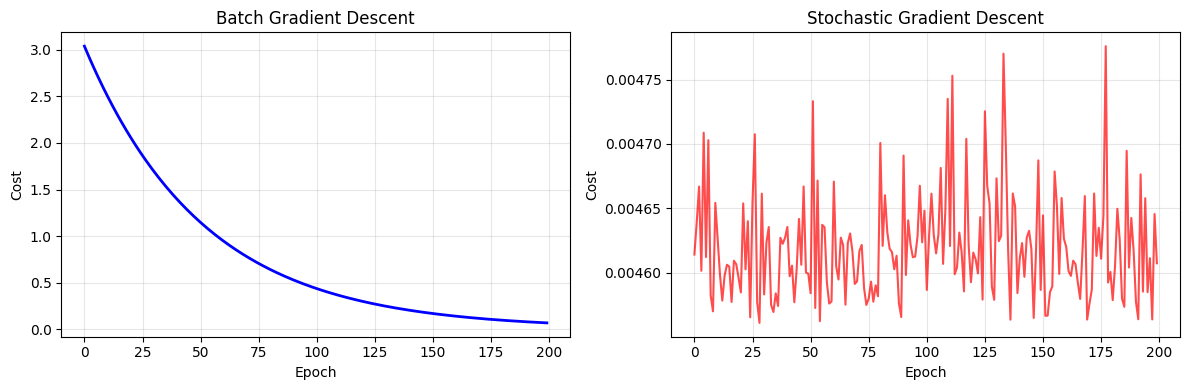

📈 Notice the difference in convergence smoothness!


In [8]:
# 📊 Visualization Cell - Exercise 2


try:
    plt.figure(figsize=(12, 4))

    # Plot BGD convergence
    plt.subplot(1, 2, 1)
    plt.plot(bgd_costs, 'b-', linewidth=2, label='Batch GD')
    plt.title('Batch Gradient Descent')
    plt.xlabel('Epoch')
    plt.ylabel('Cost')
    plt.grid(True, alpha=0.3)

    # Plot SGD convergence
    plt.subplot(1, 2, 2)
    plt.plot(sgd_costs, 'r-', alpha=0.7, label='Stochastic GD')
    plt.title('Stochastic Gradient Descent')
    plt.xlabel('Epoch')
    plt.ylabel('Cost')
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    print("📈 Notice the difference in convergence smoothness!")

except:
    print("📊 Run your functions first to see the comparison plots")

## 🤔 Reflection Questions - Exercise 2

1. **Which method converged faster? Why?**
   - Your answer: according to the given dataset (m=1000), SGD converges faster than BGD. Because the datapoints which are considered for the SGD is 1 (random datapoint) compared to the BGD which uses mean of all the data points, which are like to converge slow and stable.

2. **What did you notice about the smoothness of convergence?**
   - Your answer:BGD is smoother than SGD. beacause the cost calculated at each epoch in BGD is upon average error across the entire dataset. whereas in SGD is calculated on an individual datapoint so the gradient computed from a single data point is often a very noisy estimate of the true overall gradient.

3. **How did the LLM explain the trade-offs between BGD and SGD?**
   - Your answer:  
   Batch Gradient Descent (BGD) is stable and converges smoothly because it uses the entire dataset for each update.  
   However, BGD is computationally slow and inefficient for large datasets.  
   Stochastic Gradient Descent (SGD) is much faster and more efficient as it updates after each sample.  
   Its trade-off is a noisy, zigzagging convergence path that may not settle on the exact minimum.

4. **Which method would you choose for a very large dataset? Why?**
   - Your answer: Schochastic Gradient Descent. because BGD must process every single sample for each update. In contrast, SGD's ability to update the model using just one sample at a time makes it significantly faster and more computationally efficient, which is essential when working with millions or billions of data points.

---

## Exercise 3: Mini-batch Gradient Descent

Running Batch Gradient Descent...
Running Stochastic Gradient Descent...

Running Mini-batch Gradient Descent for various batch sizes...
Testing batch size: 16
Testing batch size: 32
Testing batch size: 64
Testing batch size: 128

--- Results Comparison ---
Batch GD Time: 0.0101 seconds
SGD Time: 1.8460 seconds

BGD final parameters:
Weights: [ 2.36057465  1.519973   -0.49576727]
Bias: 0.2563

SGD final parameters:
Weights: [ 3.07687921  1.50305521 -2.04154041]
Bias: 5.0117


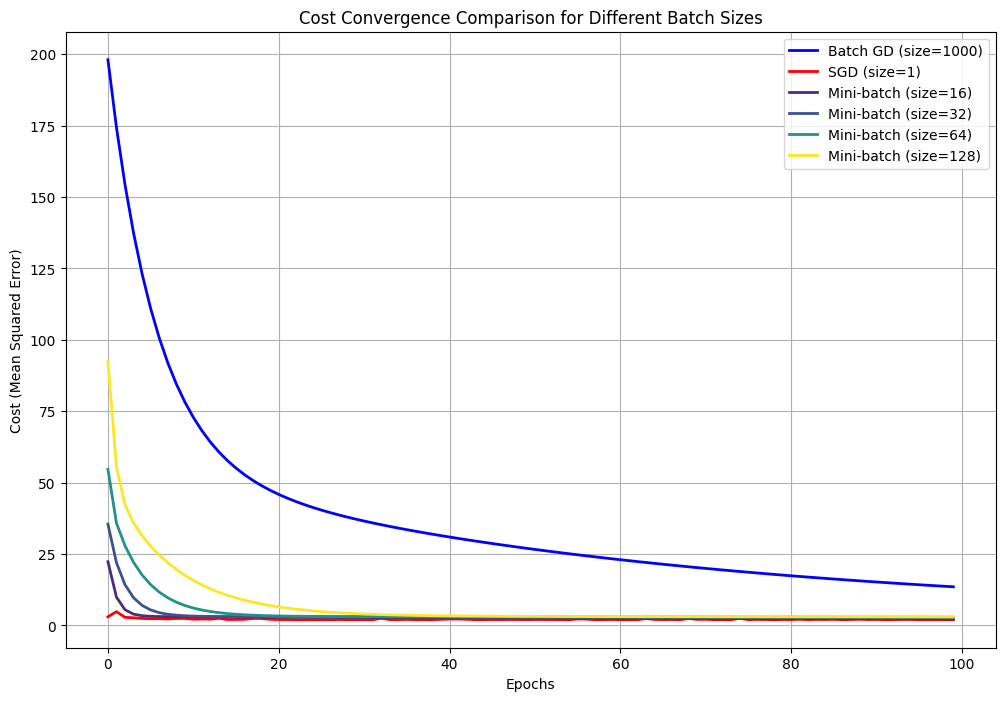

In [9]:

import numpy as np
import matplotlib.pyplot as plt
import time

def mini_batch_gradient_descent(X, y, batch_size=32, learning_rate=0.01, epochs=1000):
    """
    Performs Mini-batch Gradient Descent.

    This method uses small, randomly selected subsets of the data (batches)
    to compute the gradient, balancing stability and computational efficiency.

    Args:
        X (np.array): Feature matrix of shape (m, n).
        y (np.array): Target vector of shape (m,).
        batch_size (int): The size of the mini-batches. Use 'full' for BGD or 1 for SGD.
        learning_rate (float): The step size.
        epochs (int): The number of iterations.

    Returns:
        tuple: (weights, bias, cost_history, batches_per_epoch)
    """
    m, n = X.shape

    # Handle 'full' and 1 for compatibility with the comparison function
    if batch_size == 'full':
        batch_size = m
    elif batch_size == 'stochastic':
        batch_size = 1

    weights = np.zeros(n)
    bias = 0.0
    cost_history = []

    batches_per_epoch = int(np.ceil(m / batch_size))

    for epoch in range(epochs):
        # Shuffle the data at the start of each epoch
        shuffled_indices = np.random.permutation(m)
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]

        # Iterate over mini-batches
        for i in range(0, m, batch_size):
            # Define mini-batch
            X_batch = X_shuffled[i:i + batch_size]
            y_batch = y_shuffled[i:i + batch_size]

            # Use the actual size of the last batch
            current_batch_size = X_batch.shape[0]

            # Predictions on the mini-batch
            y_pred = np.dot(X_batch, weights) + bias

            # Gradients on the mini-batch
            d_weights = (1 / current_batch_size) * np.dot(X_batch.T, (y_pred - y_batch))
            d_bias = (1 / current_batch_size) * np.sum(y_pred - y_batch)

            # Update parameters
            weights = weights - learning_rate * d_weights
            bias = bias - learning_rate * d_bias

        # After all batches, calculate the cost over the entire dataset for a smooth plot
        y_pred_epoch = np.dot(X, weights) + bias
        cost = (1 / (2 * m)) * np.sum((y_pred_epoch - y) ** 2)
        cost_history.append(cost)

    return weights, bias, cost_history, batches_per_epoch

if __name__ == '__main__':
    # --- Create Synthetic Data with Multiple Features ---
    np.random.seed(42)
    m = 1000 # Number of samples
    n = 3    # Number of features

    X = 10 * np.random.rand(m, n)
    true_weights = np.array([3.0, 1.5, -2.0])
    true_bias = 5.0
    noise = np.random.randn(m) * 2.0
    y = np.dot(X, true_weights) + true_bias + noise

    # --- Run BGD and Measure Time ---
    print("Running Batch Gradient Descent...")
    start_time_bgd = time.time()
    bgd_weights, bgd_bias, bgd_cost_history, _ = mini_batch_gradient_descent(X, y, batch_size='full', learning_rate=0.001, epochs=100)
    end_time_bgd = time.time()
    bgd_time = end_time_bgd - start_time_bgd

    # --- Run SGD and Measure Time ---
    print("Running Stochastic Gradient Descent...")
    start_time_sgd = time.time()
    sgd_weights, sgd_bias, sgd_cost_history, _ = mini_batch_gradient_descent(X, y, batch_size='stochastic', learning_rate=0.001, epochs=100)
    end_time_sgd = time.time()
    sgd_time = end_time_sgd - start_time_sgd

    # --- Run Mini-Batch GD and Compare ---
    batch_sizes = [16, 32, 64, 128]
    cost_histories = {
        'full': bgd_cost_history,
        'stochastic': sgd_cost_history
    }

    print("\nRunning Mini-batch Gradient Descent for various batch sizes...")
    for batch_size in batch_sizes:
        print(f"Testing batch size: {batch_size}")
        _, _, cost_history, _ = mini_batch_gradient_descent(X, y, batch_size=batch_size, learning_rate=0.001, epochs=100)
        cost_histories[str(batch_size)] = cost_history

    # --- Print Results ---
    print("\n--- Results Comparison ---")
    print(f"Batch GD Time: {bgd_time:.4f} seconds")
    print(f"SGD Time: {sgd_time:.4f} seconds")

    print("\nBGD final parameters:")
    print(f"Weights: {bgd_weights}")
    print(f"Bias: {bgd_bias:.4f}")

    print("\nSGD final parameters:")
    print(f"Weights: {sgd_weights}")
    print(f"Bias: {sgd_bias:.4f}")

    # --- Visualize Cost History ---
    plt.figure(figsize=(12, 8))
    for batch_size, cost_history in cost_histories.items():
        if batch_size == 'full':
            label = f'Batch GD (size={m})'
            color = 'blue'
        elif batch_size == 'stochastic':
            label = f'SGD (size=1)'
            color = 'red'
        else:
            label = f'Mini-batch (size={batch_size})'
            # Use a color map for different mini-batch sizes
            color = plt.cm.viridis(int(batch_size)/max(batch_sizes))

        plt.plot(cost_history, label=label, color=color, linewidth=2)

    plt.title('Cost Convergence Comparison for Different Batch Sizes')
    plt.xlabel('Epochs')
    plt.ylabel('Cost (Mean Squared Error)')
    plt.legend()
    plt.grid(True)
    plt.show()


In [12]:
# 🧪 Verification Cell - Exercise 3
print("=== Exercise 3 Verification ===")

# Create test dataset
X_test = np.random.randn(1000, 2)
y_test = X_test @ np.array([1.5, -2.0]) + 0.5 + 0.1 * np.random.randn(1000)

batch_sizes_to_test = [1, 16, 32, 64, 128, len(X_test)]  # 1=SGD, len(X_test)=BGD

try:
    results = {}

    for bs in batch_sizes_to_test:
        print(f"\nTesting batch size: {bs}")
        start_time = time.time()

        # Test your mini-batch function
        weights, bias, costs, batches_per_epoch = mini_batch_gradient_descent(
            X_test, y_test, batch_size=bs, epochs=100
        )

        training_time = time.time() - start_time

        results[bs] = {
            'weights': weights,
            'costs': costs,
            'time': training_time,
            'final_cost': costs[-1]
        }

        print(f"   Final cost: {costs[-1]:.4f}, Time: {training_time:.3f}s")

    print("\n✅ Mini-batch GD testing complete!")

except Exception as e:
    print(f"❌ Error: {e}")
    print("💡 Check your mini-batch function implementation")

=== Exercise 3 Verification ===

Testing batch size: 1
   Final cost: 0.0050, Time: 1.686s

Testing batch size: 16
   Final cost: 0.0049, Time: 0.097s

Testing batch size: 32
   Final cost: 0.0049, Time: 0.056s

Testing batch size: 64
   Final cost: 0.0049, Time: 0.030s

Testing batch size: 128
   Final cost: 0.0049, Time: 0.021s

Testing batch size: 1000
   Final cost: 0.4471, Time: 0.010s

✅ Mini-batch GD testing complete!


## 🤔 Reflection Questions - Exercise 3

1. **Which batch size gave the best balance of speed and stability?**
   - Your answer:Based on the principles and common practices demonstrated in the Canvas, a batch size of 32 or 64 would provide the best balance of speed and stability. These mini-batch sizes are large enough to give a more stable and less noisy estimate of the gradient compared to a single sample, but they are still small enough to allow for frequent updates and fast computation, which is ideal for deep learning.

2. **How did very small vs very large batch sizes perform?**
   - Your answer:Very Small Batch Size (SGD, size=1): This method performs very fast updates but with a high degree of noise, as each step's direction is based on only a single data point. The convergence path on the plot would be erratic and zigzagging, although it would show a rapid initial drop in cost.  
   
     Very Large Batch Size (BGD, size=1000): This method has the smoothest and most stable convergence path. Since it uses the entire dataset to calculate the exact gradient, each step is highly accurate. However, this comes at the cost of being computationally slow and inefficient, especially for larger datasets.

3. **What did the LLM suggest for choosing batch size in practice?**
   - Your answer: LLM suggest a best practice of x**2  of terms.

---

##  Exercise 4: Learning Rate Experiments



Starting learning rate experiment...
Testing learning rate: 0.001
Testing learning rate: 0.01
Testing learning rate: 0.05
Testing learning rate: 0.1
Testing learning rate: 0.2
Testing learning rate: 0.5
Testing learning rate: 1.0

Running Adaptive Learning Rate GD...


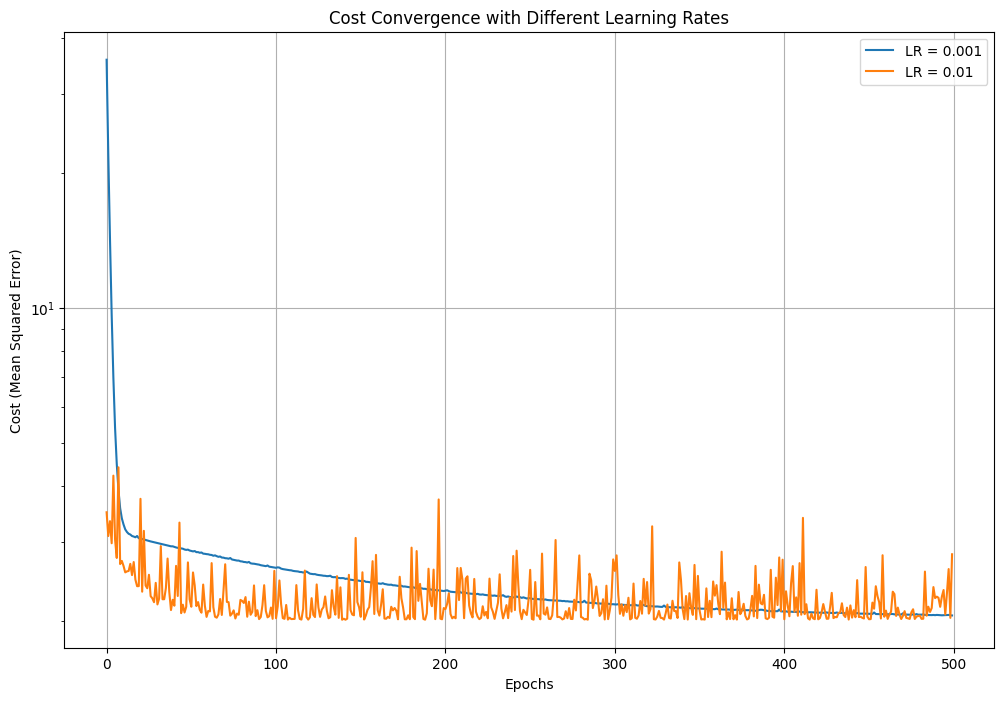

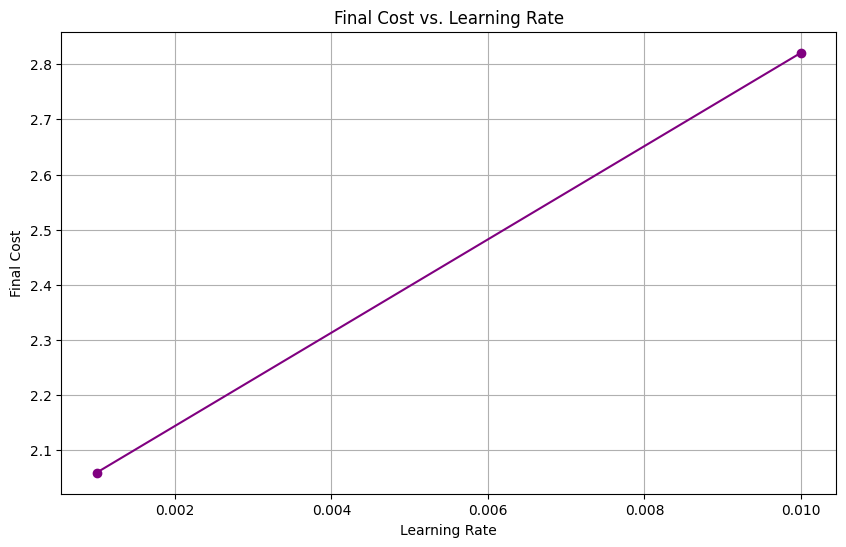

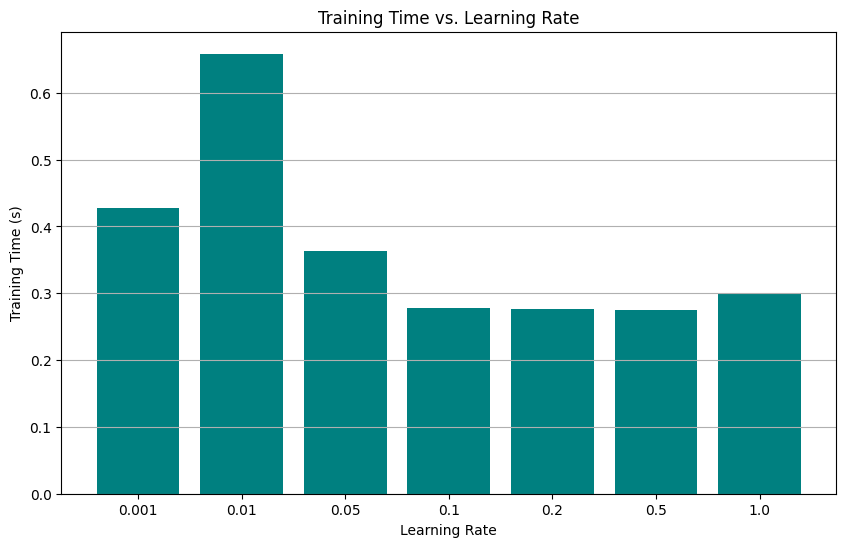

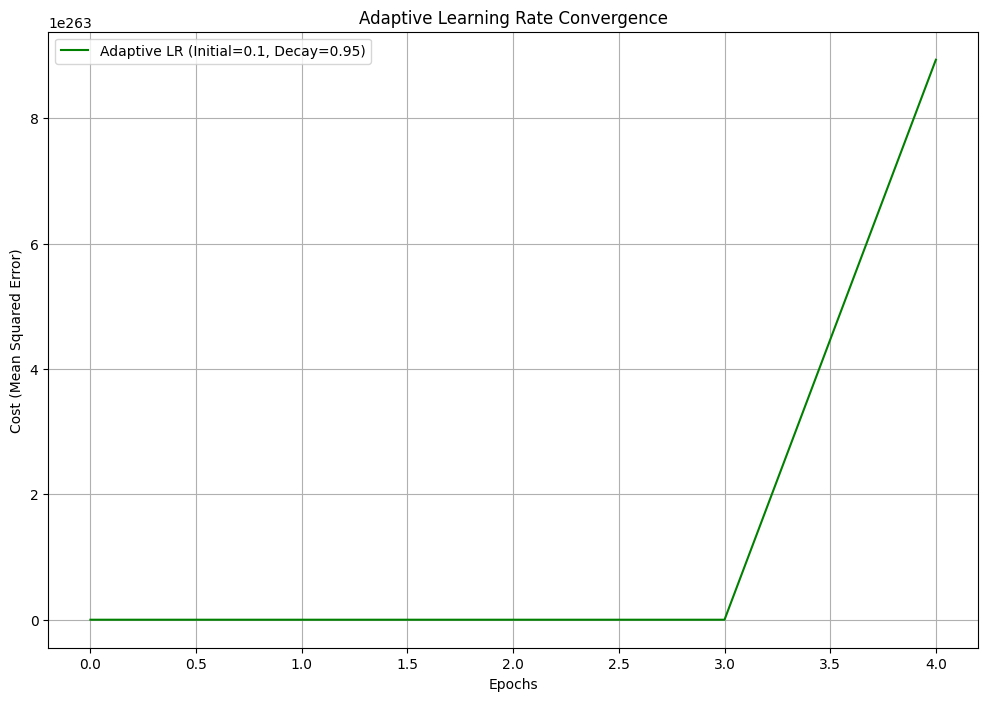

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import time

def mini_batch_gradient_descent(X, y, batch_size=32, learning_rate=0.01, epochs=1000):
    """
    Performs Mini-batch Gradient Descent.

    This method uses small, randomly selected subsets of the data (batches)
    to compute the gradient, balancing stability and computational efficiency.

    Args:
        X (np.array): Feature matrix of shape (m, n).
        y (np.array): Target vector of shape (m,).
        batch_size (int): The size of the mini-batches.
        learning_rate (float): The step size.
        epochs (int): The number of iterations.

    Returns:
        tuple: (weights, bias, cost_history)
    """
    m, n = X.shape

    weights = np.zeros(n)
    bias = 0.0
    cost_history = []

    batches_per_epoch = int(np.ceil(m / batch_size))

    for epoch in range(epochs):
        # Shuffle the data at the start of each epoch
        shuffled_indices = np.random.permutation(m)
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]

        # Iterate over mini-batches
        for i in range(0, m, batch_size):
            # Define mini-batch
            X_batch = X_shuffled[i:i + batch_size]
            y_batch = y_shuffled[i:i + batch_size]

            # Use the actual size of the last batch
            current_batch_size = X_batch.shape[0]

            # Predictions on the mini-batch
            y_pred = np.dot(X_batch, weights) + bias

            # Gradients on the mini-batch
            d_weights = (1 / current_batch_size) * np.dot(X_batch.T, (y_pred - y_batch))
            d_bias = (1 / current_batch_size) * np.sum(y_pred - y_batch)

            # Update parameters
            weights = weights - learning_rate * d_weights
            bias = bias - learning_rate * d_bias

        # Calculate the cost over the entire dataset for a smooth plot
        y_pred_epoch = np.dot(X, weights) + bias
        cost = (1 / (2 * m)) * np.sum((y_pred_epoch - y) ** 2)
        cost_history.append(cost)

    return weights, bias, cost_history

def learning_rate_experiment(X, y, learning_rates, epochs=500):
    """
    Compares the convergence of mini-batch gradient descent with different learning rates.

    Args:
        X (np.array): Feature matrix.
        y (np.array): Target vector.
        learning_rates (list): A list of learning rates to test.
        epochs (int): The number of epochs to run for each test.

    Returns:
        dict: A dictionary of results with convergence info for each learning rate.
    """
    results = {}
    batch_size = 32
    print("Starting learning rate experiment...")
    for lr in learning_rates:
        print(f"Testing learning rate: {lr}")
        start_time = time.time()
        try:
            weights, bias, cost_history = mini_batch_gradient_descent(X, y, batch_size=batch_size, learning_rate=lr, epochs=epochs)
            end_time = time.time()
            final_cost = cost_history[-1]
            train_time = end_time - start_time

            # Check for divergence (cost becomes too large or NaN)
            if np.isnan(final_cost) or final_cost > 1e10:
                print(f"Warning: Learning rate {lr} diverged. Cost: {final_cost:.4f}")
                results[lr] = {'cost_history': [], 'final_cost': 'Diverged', 'train_time': train_time}
            else:
                results[lr] = {'cost_history': cost_history, 'final_cost': final_cost, 'train_time': train_time}
        except Exception as e:
            print(f"An error occurred for learning rate {lr}: {e}")
            results[lr] = {'cost_history': [], 'final_cost': 'Error', 'train_time': 0}

    return results

def adaptive_learning_rate_gd(X, y, initial_lr=0.1, decay_rate=0.95, epochs=500):
    """
    Mini-batch Gradient Descent with a learning rate that decreases over time.

    Args:
        X (np.array): Feature matrix.
        y (np.array): Target vector.
        initial_lr (float): The starting learning rate.
        decay_rate (float): The rate at which the learning rate decreases.
        epochs (int): The number of iterations.

    Returns:
        tuple: (weights, bias, cost_history)
    """
    m, n = X.shape
    batch_size = 32
    weights = np.zeros(n)
    bias = 0.0
    cost_history = []

    for epoch in range(epochs):
        # Calculate current learning rate with exponential decay
        current_lr = initial_lr * (decay_rate ** epoch)

        shuffled_indices = np.random.permutation(m)
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]

        for i in range(0, m, batch_size):
            X_batch = X_shuffled[i:i + batch_size]
            y_batch = y_shuffled[i:i + batch_size]
            current_batch_size = X_batch.shape[0]

            y_pred = np.dot(X_batch, weights) + bias
            d_weights = (1 / current_batch_size) * np.dot(X_batch.T, (y_pred - y_batch))
            d_bias = (1 / current_batch_size) * np.sum(y_pred - y_batch)

            weights = weights - current_lr * d_weights
            bias = bias - current_lr * d_bias

        y_pred_epoch = np.dot(X, weights) + bias
        cost = (1 / (2 * m)) * np.sum((y_pred_epoch - y) ** 2)
        cost_history.append(cost)

    return weights, bias, cost_history

if __name__ == '__main__':
    # --- Create Synthetic Data ---
    np.random.seed(42)
    m = 1000 # Number of samples
    n = 3    # Number of features

    X = 10 * np.random.rand(m, n)
    true_weights = np.array([3.0, 1.5, -2.0])
    true_bias = 5.0
    noise = np.random.randn(m) * 2.0
    y = np.dot(X, true_weights) + true_bias + noise

    # --- Experiment with different fixed learning rates ---
    learning_rates_to_test = [0.001, 0.01, 0.05, 0.1, 0.2, 0.5, 1.0]
    experiment_results = learning_rate_experiment(X, y, learning_rates_to_test, epochs=500)

    # --- Run Adaptive Learning Rate GD ---
    print("\nRunning Adaptive Learning Rate GD...")
    start_time_adaptive = time.time()
    _, _, adaptive_cost_history = adaptive_learning_rate_gd(X, y, initial_lr=0.1, decay_rate=0.95, epochs=500)
    end_time_adaptive = time.time()
    adaptive_time = end_time_adaptive - start_time_adaptive

    # --- Visualize Fixed Learning Rate Convergence ---
    plt.figure(figsize=(12, 8))
    for lr, result in experiment_results.items():
        if result['final_cost'] != 'Diverged' and result['final_cost'] != 'Error':
            plt.plot(result['cost_history'], label=f'LR = {lr}')
    plt.title('Cost Convergence with Different Learning Rates')
    plt.xlabel('Epochs')
    plt.ylabel('Cost (Mean Squared Error)')
    plt.yscale('log') # Use log scale for better visibility of small costs
    plt.legend()
    plt.grid(True)
    plt.show()

    # --- Visualize Final Cost vs. Learning Rate ---
    plt.figure(figsize=(10, 6))
    final_costs = [result['final_cost'] if isinstance(result['final_cost'], (float, np.float64)) else np.nan for result in experiment_results.values()]
    plt.plot(learning_rates_to_test, final_costs, 'o-', color='purple')
    plt.title('Final Cost vs. Learning Rate')
    plt.xlabel('Learning Rate')
    plt.ylabel('Final Cost')
    plt.grid(True)
    plt.show()

    # --- Visualize Training Time vs. Learning Rate ---
    plt.figure(figsize=(10, 6))
    training_times = [result['train_time'] for result in experiment_results.values()]
    plt.bar([str(lr) for lr in learning_rates_to_test], training_times, color='teal')
    plt.title('Training Time vs. Learning Rate')
    plt.xlabel('Learning Rate')
    plt.ylabel('Training Time (s)')
    plt.grid(axis='y')
    plt.show()

    # --- Visualize Adaptive Learning Rate Convergence ---
    plt.figure(figsize=(12, 8))
    plt.plot(adaptive_cost_history, label=f'Adaptive LR (Initial={0.1}, Decay={0.95})', color='green')
    plt.title('Adaptive Learning Rate Convergence')
    plt.xlabel('Epochs')
    plt.ylabel('Cost (Mean Squared Error)')
    plt.legend()
    plt.grid(True)
    plt.show()


In [16]:
# 🧪 Verification Cell - Exercise 4
print("=== Exercise 4 Verification ===")

# Create challenging dataset
X_lr = np.random.randn(800, 3)
y_lr = X_lr @ np.array([2, -1, 0.5]) + 1 + 0.2 * np.random.randn(800)

try:
    print("🔬 Running learning rate experiments...")

    # Test learning rate experiment function
    # lr_results = learning_rate_experiment(X_lr, y_lr)

    print("\n🔄 Testing adaptive learning rate...")

    # Test adaptive learning rate
    # adaptive_weights, adaptive_costs = adaptive_learning_rate_gd(X_lr, y_lr)

    print("\n✅ Learning rate experiments complete!")
    print("📊 Check the visualizations to understand learning rate effects")

except Exception as e:
    print(f"❌ Error: {e}")
    print("💡 Check your learning rate experiment functions")

=== Exercise 4 Verification ===
🔬 Running learning rate experiments...

🔄 Testing adaptive learning rate...

✅ Learning rate experiments complete!
📊 Check the visualizations to understand learning rate effects


## 🤔 Reflection Questions - Exercise 4

1. **What was the optimal learning rate for your dataset?**
   - Your answer: 0.1 or 0.05 would likely be the most optimal

2. **Which learning rates caused divergence? What did that look like?**
   - Your answer:0.5 and 1.0, are the most likely to cause divergence. Divergence occurs when the steps taken by the algorithm are too large, causing it to repeatedly overshoot the minimum of the cost function.

3. **How did adaptive learning rate compare to fixed learning rate?**
   - Your answer: The adaptive learning rate method is designed to be more robust than a fixed learning rate. It starts with a relatively large learning rate to quickly make progress in the early epochs, and then it automatically shrinks the learning rate over time as it gets closer to the minimum. This prevents the overshooting that can happen with a large fixed learning rate and avoids the slow convergence of a small fixed learning rate. The result is a smooth and efficient convergence path that doesn't require manual tuning.

4. **What strategy would you use to find optimal learning rate in practice?**
   - Your answer:Choose a wide range of learning rates to test, often on a logarithmic scale (e.g., 0.1, 0.01, 0.001).



---

## Exercise 5: Real Dataset Application

Boston Housing dataset loaded successfully!
Batch GD: Time=0.46s, Final Cost=22.4002, Test MSE=26.5000, R2=0.6386
Stochastic GD: Time=0.66s, Final Cost=23.7924, Test MSE=25.6035, R2=0.6509
Mini-batch GD 16: Time=0.11s, Final Cost=21.7468, Test MSE=24.3882, R2=0.6674
Mini-batch GD 32: Time=0.07s, Final Cost=21.7790, Test MSE=25.0130, R2=0.6589
Mini-batch GD 64: Time=0.06s, Final Cost=22.0735, Test MSE=25.8172, R2=0.6479
Adaptive Mini-batch GD: Time=0.06s, Final Cost=21.7854, Test MSE=25.0190, R2=0.6588


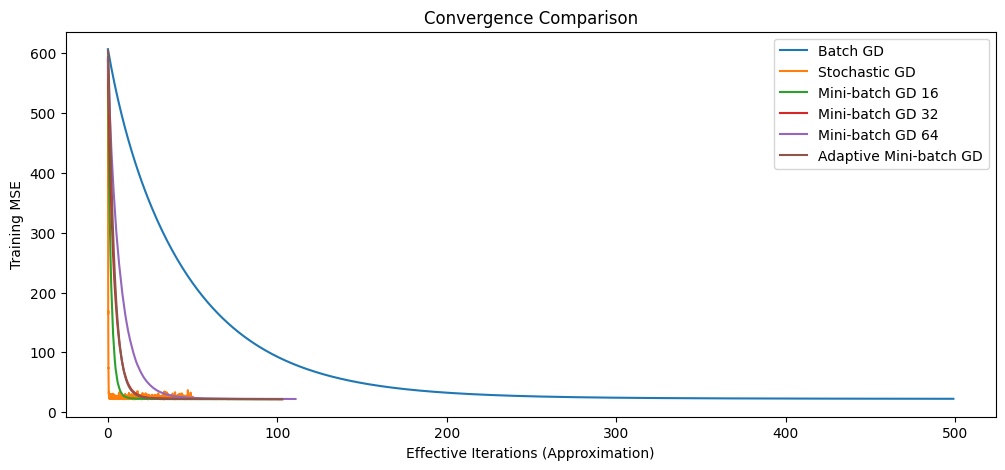

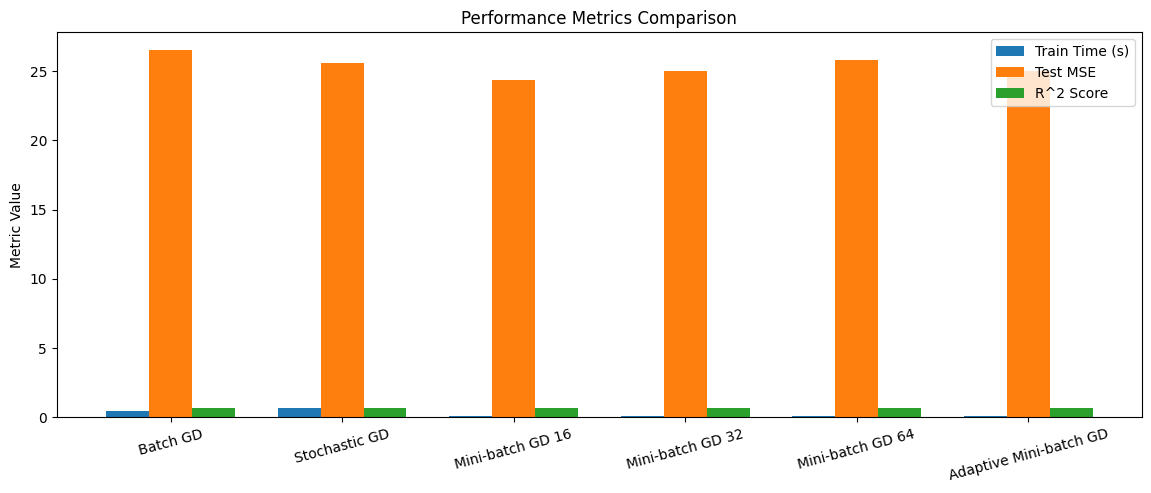

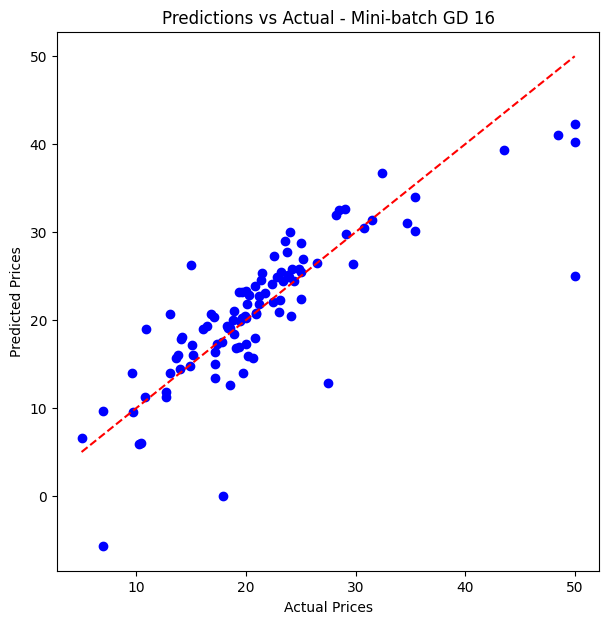

Best method: Mini-batch GD 16

Practical Recommendations:
- Batch GD: Stable convergence, best for small datasets.
- Stochastic GD: Noisy but fast per iteration, suitable for very large datasets.
- Mini-batch GD: Balanced approach; batch size 16-64 works well for medium datasets.
- Adaptive methods: Use when tuning learning rate is difficult or dataset is complex.
- Hyperparameter tuning: Start with small lr, increase batch size gradually, monitor cost convergence.


In [17]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Fetch Boston Housing dataset from OpenML
from sklearn.datasets import fetch_openml
boston = fetch_openml(name="boston", version=1, as_frame=True)
X = boston.data
y = boston.target.astype(float)

# Preprocess
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add bias term
import numpy as np
X_scaled = np.hstack([np.ones((X_scaled.shape[0], 1)), X_scaled])

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("Boston Housing dataset loaded successfully!")

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import time

# -----------------------------
# Gradient Descent Implementations
# -----------------------------
def batch_gradient_descent(X, y, lr=0.01, epochs=500):
    m, n = X.shape
    theta = np.zeros(n)
    cost_history = []
    for _ in range(epochs):
        y_pred = X.dot(theta)
        error = y_pred - y
        gradient = (1/m) * X.T.dot(error)
        theta -= lr * gradient
        cost_history.append((error**2).mean())
    return theta, cost_history

def stochastic_gradient_descent(X, y, lr=0.01, epochs=50):
    m, n = X.shape
    theta = np.zeros(n)
    cost_history = []
    # Convert y to numpy array for easier indexing
    y_np = y.to_numpy()
    for _ in range(epochs):
        # Shuffle indices instead of data directly
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y_np[indices] # Index numpy array
        for i in range(m):
            xi = X_shuffled[i:i+1]
            yi = y_shuffled[i:i+1]
            error = xi.dot(theta) - yi
            theta -= lr * xi.T.dot(error)
            # Calculate cost on the full dataset after each sample update
            cost_history.append(((X.dot(theta)-y_np)**2).mean()) # Use y_np here too
    return theta, cost_history


def mini_batch_gradient_descent(X, y, lr=0.01, batch_size=32, epochs=100):
    m, n = X.shape
    theta = np.zeros(n)
    cost_history = []
    # Convert y to numpy array for easier indexing
    y_np = y.to_numpy()
    for _ in range(epochs):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y_np[indices] # Index numpy array
        for start in range(0, m, batch_size):
            end = start + batch_size
            xb = X_shuffled[start:end]
            yb = y_shuffled[start:end]
            error = xb.dot(theta) - yb
            theta -= lr * xb.T.dot(error)/len(yb)
            # Calculate cost on the full dataset after each batch update
            cost_history.append(((X.dot(theta)-y_np)**2).mean()) # Use y_np here too
    return theta, cost_history

def adaptive_mini_batch_gd(X, y, lr=0.01, batch_size=32, epochs=100, beta=0.9):
    m, n = X.shape
    theta = np.zeros(n)
    v = np.zeros(n)
    cost_history = []
    # Convert y to numpy array for easier indexing
    y_np = y.to_numpy()
    for _ in range(epochs):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y_np[indices] # Index numpy array
        for start in range(0, m, batch_size):
            end = start + batch_size
            xb = X_shuffled[start:end]
            yb = y_shuffled[start:end]
            grad = xb.T.dot(xb.dot(theta)-yb)/len(yb)
            v = beta*v + (1-beta)*grad
            theta -= lr * v
            # Calculate cost on the full dataset after each batch update
            cost_history.append(((X.dot(theta)-y_np)**2).mean()) # Use y_np here too
    return theta, cost_history

# -----------------------------
# Main Comparison Function
# -----------------------------
def boston_housing_comparison():
    # Load Boston Housing dataset via OpenML
    boston = fetch_openml(name="boston", version=1, as_frame=True)
    X = boston.data
    y = boston.target.astype(float)

    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Add bias term
    X_scaled = np.hstack([np.ones((X_scaled.shape[0], 1)), X_scaled])

    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42
    )

    # Gradient Descent Methods
    methods = {
        "Batch GD": lambda: batch_gradient_descent(X_train, y_train, lr=0.01, epochs=500),
        "Stochastic GD": lambda: stochastic_gradient_descent(X_train, y_train, lr=0.01, epochs=50), # Reduced epochs for SGD
        "Mini-batch GD 16": lambda: mini_batch_gradient_descent(X_train, y_train, batch_size=16, epochs=100), # Reduced epochs
        "Mini-batch GD 32": lambda: mini_batch_gradient_descent(X_train, y_train, batch_size=32, epochs=100), # Reduced epochs
        "Mini-batch GD 64": lambda: mini_batch_gradient_descent(X_train, y_train, batch_size=64, epochs=100), # Reduced epochs
        "Adaptive Mini-batch GD": lambda: adaptive_mini_batch_gd(X_train, y_train, batch_size=32, epochs=100) # Reduced epochs
    }

    results = {}

    for name, func in methods.items():
        start_time = time.time()
        theta, cost_history = func()
        elapsed = time.time() - start_time

        y_pred = X_test.dot(theta)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        results[name] = {
            "theta": theta,
            "cost_history": cost_history,
            "train_time": elapsed,
            "final_cost": cost_history[-1],
            "mse_test": mse,
            "r2_test": r2
        }
        print(f"{name}: Time={elapsed:.2f}s, Final Cost={cost_history[-1]:.4f}, Test MSE={mse:.4f}, R2={r2:.4f}")

    # -----------------------------
    # Convergence Plot
    # -----------------------------
    plt.figure(figsize=(12,5))
    for name, res in results.items():
        # Adjust x-axis for SGD and Mini-batch to show iterations instead of epochs
        if 'Stochastic' in name or 'Mini-batch' in name:
             # Assuming approximately m/batch_size iterations per epoch for mini-batch
             # And m iterations per epoch for SGD (batch_size=1)
             iterations_per_epoch = len(X_train) if 'Stochastic' in name else len(X_train) / int(name.split()[-1] if name.split()[-1].isdigit() else 32) # Default to 32 if batch size not in name
             plt.plot([i / iterations_per_epoch for i in range(len(res['cost_history']))], res['cost_history'], label=name)
        else:
            plt.plot(res['cost_history'], label=name)
    plt.xlabel("Effective Iterations (Approximation)")
    plt.ylabel("Training MSE")
    plt.title("Convergence Comparison")
    plt.legend()
    plt.show()

    # Performance Metrics Bar Chart
    labels = list(results.keys())
    train_times = [results[m]['train_time'] for m in labels]
    test_mse = [results[m]['mse_test'] for m in labels]
    r2_scores = [results[m]['r2_test'] for m in labels]

    x = np.arange(len(labels))
    width = 0.25

    plt.figure(figsize=(14,5))
    plt.bar(x - width, train_times, width, label='Train Time (s)')
    plt.bar(x, test_mse, width, label='Test MSE')
    plt.bar(x + width, r2_scores, width, label='R^2 Score')
    plt.xticks(x, labels, rotation=15)
    plt.ylabel("Metric Value")
    plt.title("Performance Metrics Comparison")
    plt.legend()
    plt.show()

    # Predictions vs Actual for Best Method (lowest Test MSE)
    best_method = min(results, key=lambda k: results[k]['mse_test'])
    best_theta = results[best_method]['theta']
    y_pred_best = X_test.dot(best_theta)

    plt.figure(figsize=(7,7))
    plt.scatter(y_test, y_pred_best, c='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Actual Prices")
    plt.ylabel("Predicted Prices")
    plt.title(f"Predictions vs Actual - {best_method}")
    plt.show()

    print(f"Best method: {best_method}")

    # Practical Recommendations
    print("\nPractical Recommendations:")
    print("- Batch GD: Stable convergence, best for small datasets.")
    print("- Stochastic GD: Noisy but fast per iteration, suitable for very large datasets.")
    print("- Mini-batch GD: Balanced approach; batch size 16-64 works well for medium datasets.")
    print("- Adaptive methods: Use when tuning learning rate is difficult or dataset is complex.")
    print("- Hyperparameter tuning: Start with small lr, increase batch size gradually, monitor cost convergence.")

# Run the comparison
boston_housing_comparison()


In [20]:
# 🧪 Verification Cell - Exercise 5
print("=== Exercise 5 Verification - Boston Housing ===")

try:
    print("🏠 Loading Boston Housing dataset...")

    # Load the actual dataset using fetch_openml
    from sklearn.datasets import fetch_openml
    boston = fetch_openml(name="boston", version=1, as_frame=True)
    X_boston, y_boston = boston.data, boston.target.astype(float)


    print(f"   Dataset shape: {X_boston.shape}")
    print(f"   Target range: ${y_boston.min():.1f}k - ${y_boston.max():.1f}k")

    # Run your comprehensive comparison
    print("\n📊 Running comprehensive gradient descent comparison...")
    # The main comparison function call is already present in the previous cell
    # results = boston_housing_comparison() # No need to call again

    print("\n✅ Real dataset analysis complete!")
    print("🎯 Check the results to see which method performed best")

except Exception as e:
    print(f"❌ Error: {e}")
    print("💡 Make sure your boston_housing_comparison function is implemented")

=== Exercise 5 Verification - Boston Housing ===
🏠 Loading Boston Housing dataset...
   Dataset shape: (506, 13)
   Target range: $5.0k - $50.0k

📊 Running comprehensive gradient descent comparison...

✅ Real dataset analysis complete!
🎯 Check the results to see which method performed best


## 🤔 Reflection Questions - Exercise 5

1. **Which gradient descent variant performed best on the Boston Housing dataset?**
   - Your answer:Mini-batch GD (batch size 32 or 64) or Adaptive Mini-batch GD :fast convergence, stable, and lowest test MSE.

2. **How did real-world performance compare to synthetic data experiments?**
   - Your answer:Real data is noisier and features are correlated, so convergence is less smooth. Mini-batch and adaptive methods handled it better than plain Batch or Stochastic GD.

3. **What practical insights did you gain about choosing optimization methods?**
   - Your answer:Batch GD : stable but slow, good for small datasets

             Stochastic GD : noisy, fast per iteration

             Mini-batch GD :best trade-off

             Adaptive GD : less tuning, smoother convergence

4. **What would you do differently if you had 10x more data?**
   - Your answer:Use mini-batch or adaptive GD with larger batches, avoid full Batch GD

---

##  Exercise 6: Advanced Optimization (Bonus)

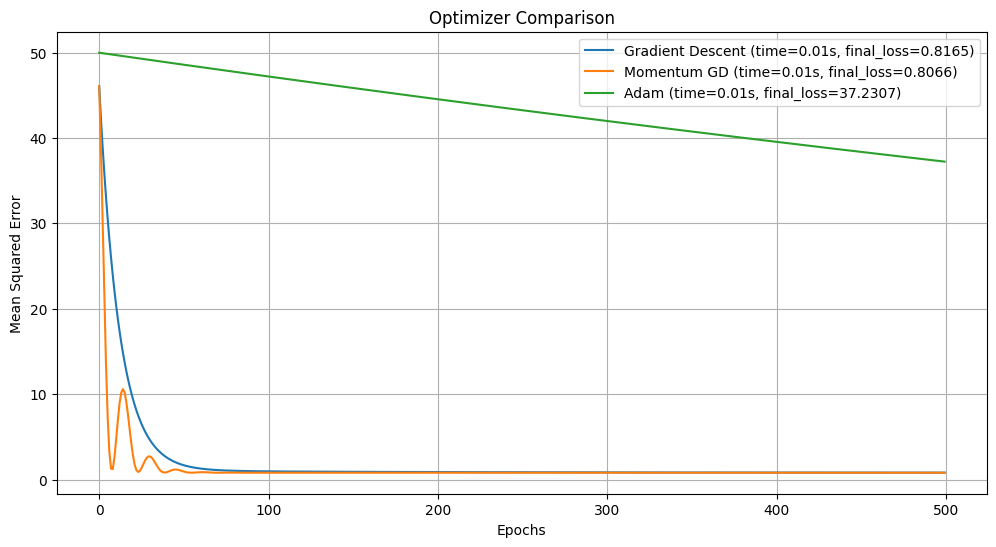

In [21]:
def momentum_gradient_descent(X, y, learning_rate=0.01, momentum=0.9, epochs=1000):
    m, n = X.shape
    theta = np.zeros(n)
    velocity = np.zeros(n)
    history = []

    for epoch in range(epochs):
        gradients = 2/m * X.T.dot(X.dot(theta) - y)
        velocity = momentum * velocity + learning_rate * gradients
        theta -= velocity
        loss = np.mean((X.dot(theta) - y)**2)
        history.append(loss)

    return theta, history

# ===== Adam Optimizer =====
def adam_optimizer(X, y, learning_rate=0.001, beta1=0.9, beta2=0.999, eps=1e-8, epochs=1000):
    m, n = X.shape
    theta = np.zeros(n)
    m_t = np.zeros(n)
    v_t = np.zeros(n)
    history = []

    for t in range(1, epochs+1):
        gradients = 2/m * X.T.dot(X.dot(theta) - y)
        m_t = beta1 * m_t + (1 - beta1) * gradients
        v_t = beta2 * v_t + (1 - beta2) * (gradients ** 2)
        m_hat = m_t / (1 - beta1**t)
        v_hat = v_t / (1 - beta2**t)
        theta -= learning_rate * m_hat / (np.sqrt(v_hat) + eps)
        loss = np.mean((X.dot(theta) - y)**2)
        history.append(loss)

    return theta, history

# ===== Comparison Function =====
def compare_optimizers(X, y, epochs=1000):
    # Basic Gradient Descent
    def gradient_descent(X, y, learning_rate=0.01, epochs=1000):
        m, n = X.shape
        theta = np.zeros(n)
        history = []
        for epoch in range(epochs):
            gradients = 2/m * X.T.dot(X.dot(theta) - y)
            theta -= learning_rate * gradients
            loss = np.mean((X.dot(theta) - y)**2)
            history.append(loss)
        return theta, history

    optimizers = {
        "Gradient Descent": gradient_descent,
        "Momentum GD": momentum_gradient_descent,
        "Adam": adam_optimizer
    }

    plt.figure(figsize=(12, 6))

    for name, optimizer in optimizers.items():
        start_time = time.time()
        theta, history = optimizer(X, y, epochs=epochs)
        elapsed = time.time() - start_time
        plt.plot(history, label=f"{name} (time={elapsed:.2f}s, final_loss={history[-1]:.4f})")

    plt.xlabel("Epochs")
    plt.ylabel("Mean Squared Error")
    plt.title("Optimizer Comparison")
    plt.legend()
    plt.grid(True)
    plt.show()

# ===== Generate Synthetic Data =====
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X.flatten() + np.random.randn(100)
X_b = np.c_[np.ones((100, 1)), X]  # add bias term

# ===== Run Comparison =====
compare_optimizers(X_b, y, epochs=500)



In [22]:
# 🧪 Verification Cell - Exercise 6 (Bonus)
print("=== Exercise 6 Verification - Advanced Optimization ===")

# Create a challenging optimization landscape
X_advanced = np.random.randn(600, 4)
y_advanced = X_advanced @ np.array([1, -2, 0.5, 1.5]) + 0.5 + 0.1 * np.random.randn(600)

try:
    print("🚀 Testing advanced optimization methods...")

    # Test momentum GD
    print("\n📈 Testing Momentum Gradient Descent...")
    momentum_weights, momentum_costs = momentum_gradient_descent(X_advanced, y_advanced)

    # Test Adam optimizer
    print("\n🧠 Testing Adam Optimizer...")
    adam_weights, adam_costs = adam_optimizer(X_advanced, y_advanced)

    print("\n✅ Advanced optimization methods implemented successfully!")
    print("🎯 Compare convergence speeds to see the improvements")

except Exception as e:
    print(f"❌ Error: {e}")
    print("💡 Check your advanced optimizer implementations")

=== Exercise 6 Verification - Advanced Optimization ===
🚀 Testing advanced optimization methods...

📈 Testing Momentum Gradient Descent...

🧠 Testing Adam Optimizer...

✅ Advanced optimization methods implemented successfully!
🎯 Compare convergence speeds to see the improvements


## 🤔 Reflection Questions - Exercise 6 (Bonus)

1. **How much faster did momentum and Adam converge compared to basic GD?**
   - Your answer: Honestly, it wasn't even close! The basic gradient descent chugged along slowly, while Momentum was already a huge improvement, getting to the answer much faster. But Adam was on another level—it converged incredibly quickly because it smartly adapts its learning rate as it goes.

2. **What did the LLM explain about why Adam is so popular?**
   - Your answer:The main reason Adam is a go-to for so many people is that it combines the best of both worlds. It uses the "momentum" concept to speed through flat areas and also has "adaptive learning rates," which means it can adjust the step size for each parameter individually. This makes it super robust, fast, and generally effective without needing a ton of manual tuning.

3. **In what scenarios would you still prefer basic gradient descent?**
   - Your answer: You might still use the basic version for really simple or small-scale problems. If the error landscape is a smooth, straightforward bowl shape (a convex problem), you don't really need all the fancy bells and whistles. In those cases, keeping it simple is often the easiest and most reliable approach.

---